In [125]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
snp= pd.read_csv("/Users/amrita/Desktop/SEM 2/Analytics in Practice/Recession /S&P500.csv")

In [4]:
snp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
5084,2020-03-19,2393.479980,2466.969971,2319.780029,2409.389893,2409.389893,7946710000
5085,2020-03-20,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9044690000
5086,2020-03-23,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,7402180000
5087,2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7547350000


In [6]:
snp['Date']=pd.to_datetime(snp['Date'])

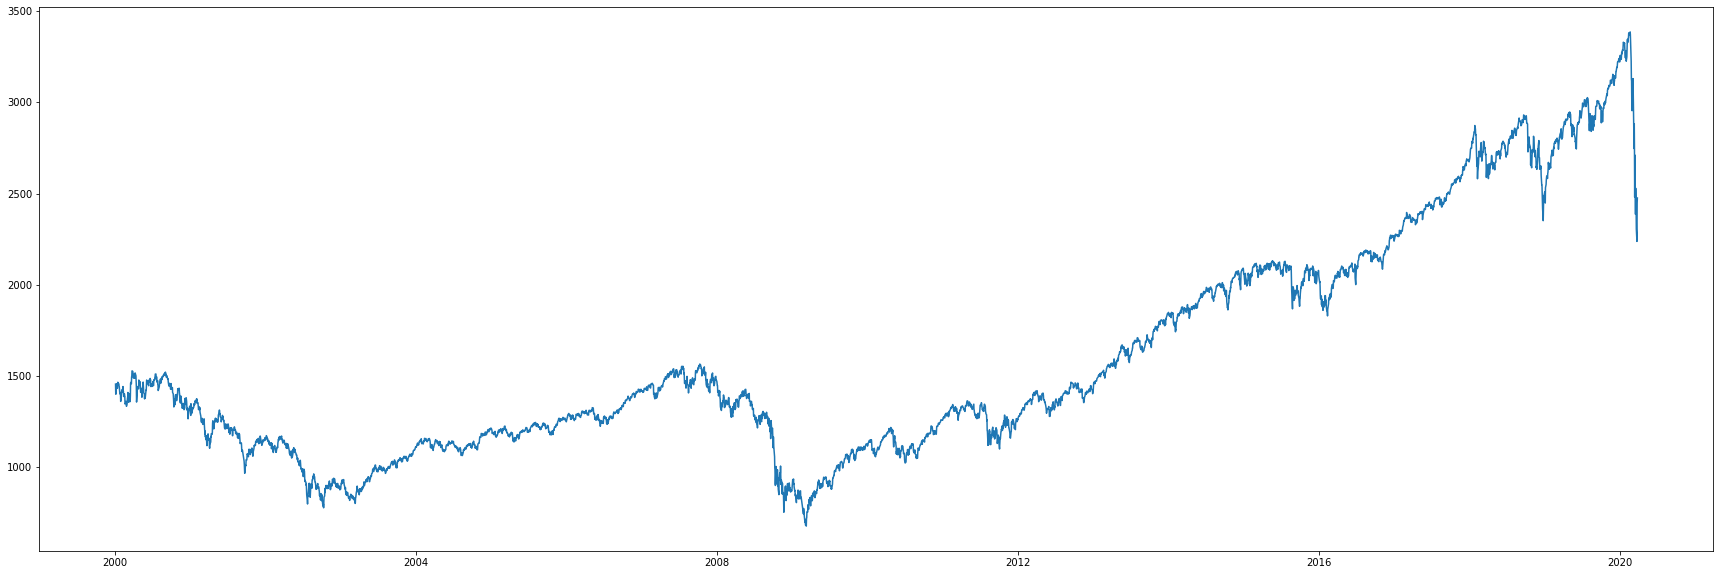

In [138]:
plt.figure(figsize=(30,10))
plt.plot(snp['Date'],snp['Adj Close'])

In [9]:
#Calculate the max drawdown in the past days for each day in the series
snp['roll_max'] = snp['Adj Close'].cummax()   # peak
snp['daily_drawdown'] = snp['Adj Close']/snp['roll_max'] - 1.0   # how much drawdown each day has from the peak

# Next we calculate the minimum (negative) daily drawdown for each day 
snp['max_daily_drawdown'] = snp['daily_drawdown'].cummin()   # min drawdown in the past days

In [10]:
snp

,Date,Open,High,Low,Close,Adj Close,Volume,roll_max,daily_drawdown,max_daily_drawdown
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1455.219971,0.000000,0.000000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1455.219971,-0.038345,-0.038345
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1455.219971,-0.036496,-0.038345
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1455.219971,-0.035575,-0.038345
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1455.219971,-0.009449,-0.038345
...,...,...,...,...,...,...,...,...,...,...
5084,2020-03-19,2393.479980,2466.969971,2319.780029,2409.389893,2409.389893,7946710000,3386.149902,-0.288457,-0.567754
5085,2020-03-20,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9044690000,3386.149902,-0.319310,-0.567754
5086,2020-03-23,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,7402180000,3386.149902,-0.339250,-0.567754
5087,2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7547350000,3386.149902,-0.277253,-0.567754


In [12]:
snp['roll_max']

0       1455.219971
1       1455.219971
2       1455.219971
3       1455.219971
4       1455.219971
           ...     
5084    3386.149902
5085    3386.149902
5086    3386.149902
5087    3386.149902
5088    3386.149902
Name: roll_max, Length: 5089, dtype: float64

In [13]:
snp['daily_drawdown']

0       0.000000
1      -0.038345
2      -0.036496
3      -0.035575
4      -0.009449
          ...   
5084   -0.288457
5085   -0.319310
5086   -0.339250
5087   -0.277253
5088   -0.268916
Name: daily_drawdown, Length: 5089, dtype: float64

In [14]:
snp['max_daily_drawdown']

0       0.000000
1      -0.038345
2      -0.038345
3      -0.038345
4      -0.038345
          ...   
5084   -0.567754
5085   -0.567754
5086   -0.567754
5087   -0.567754
5088   -0.567754
Name: max_daily_drawdown, Length: 5089, dtype: float64

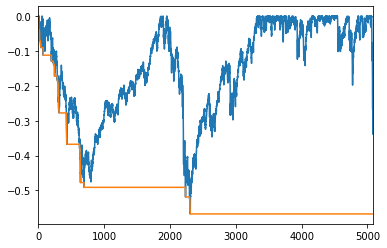

In [16]:
snp['daily_drawdown'].plot()
snp['max_daily_drawdown'].plot()
#pp.show()

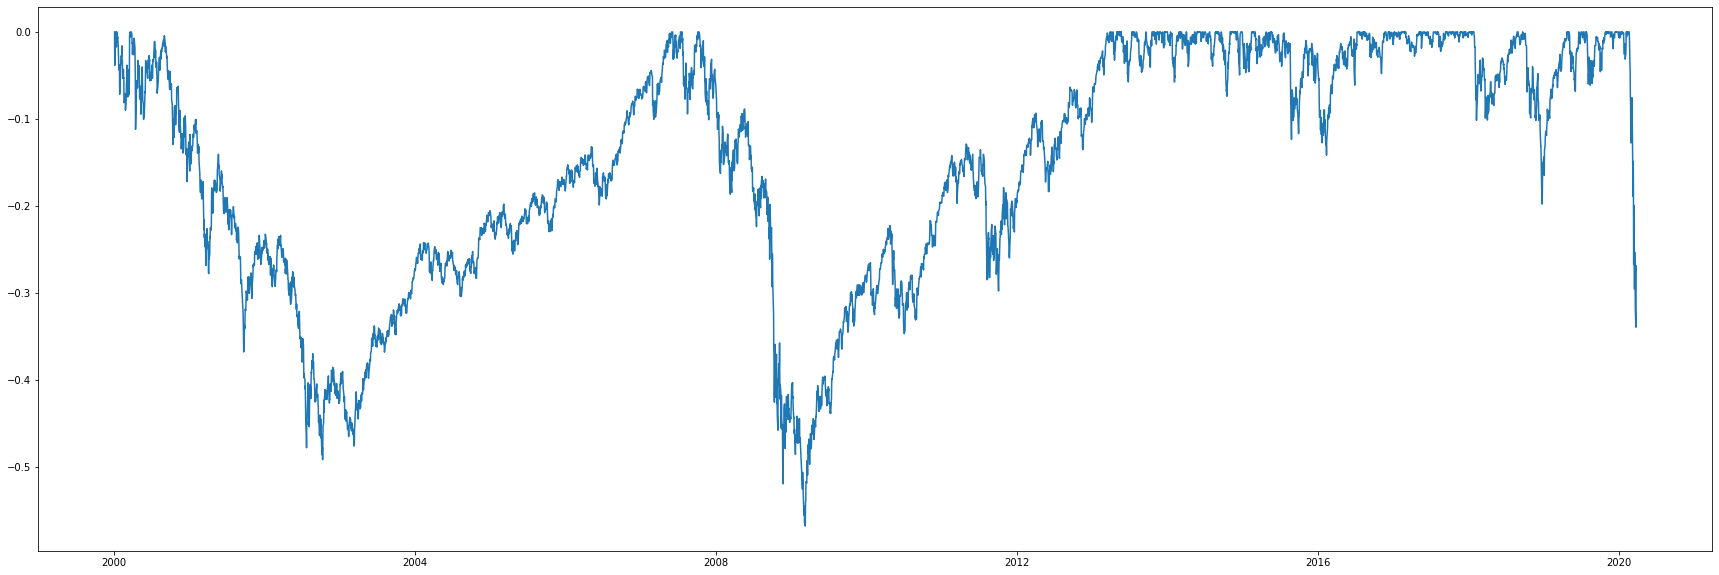

In [17]:
plt.figure(figsize=(30,10))
plt.plot(snp['Date'],snp['daily_drawdown'])

In [71]:
snpdate_less_than15 = snp[snp['daily_drawdown'] <= -0.15]['Date']
snpdd_less_than15 = snp[snp['daily_drawdown'] <= -0.15]['daily_drawdown']

In [72]:
snpdate_less_than15.isnull().values.any()

False

In [34]:
pd.set_option('display.max_rows', 5000)
snpdate_less_than15

245    2000-12-20
246    2000-12-21
252    2001-01-02
256    2001-01-08
285    2001-02-20
286    2001-02-21
287    2001-02-22
288    2001-02-23
289    2001-02-26
290    2001-02-27
291    2001-02-28
292    2001-03-01
293    2001-03-02
294    2001-03-05
295    2001-03-06
296    2001-03-07
297    2001-03-08
298    2001-03-09
299    2001-03-12
300    2001-03-13
301    2001-03-14
302    2001-03-15
303    2001-03-16
304    2001-03-19
305    2001-03-20
306    2001-03-21
307    2001-03-22
308    2001-03-23
309    2001-03-26
310    2001-03-27
311    2001-03-28
312    2001-03-29
313    2001-03-30
314    2001-04-02
315    2001-04-03
316    2001-04-04
317    2001-04-05
318    2001-04-06
319    2001-04-09
320    2001-04-10
321    2001-04-11
322    2001-04-12
323    2001-04-16
324    2001-04-17
325    2001-04-18
326    2001-04-19
327    2001-04-20
328    2001-04-23
329    2001-04-24
330    2001-04-25
331    2001-04-26
332    2001-04-27
333    2001-04-30
334    2001-05-01
335    2001-05-02
336    200

In [45]:
snpdate_less_than15.describe()

count                    2291
unique                   2291
top       2005-07-12 00:00:00
freq                        1
first     2000-12-20 00:00:00
last      2020-03-25 00:00:00
Name: Date, dtype: object

In [116]:
#converting datetime to string type so that we get only the date part
rec_date=[]
rec_string=[]
for i in snpdate_less_than15:
    rec = i.strftime('%m-%d-%Y')
    rec_string.append(rec)                  # list of recession dates in string format

rec_string
for i in rec_string:
    rec =datetime.strptime(i,'%m-%d-%Y').date()
    rec_date.append(rec)                        # list of recession dates in datetime format

In [136]:
#calculating recession periods
rec_period=[]
temp = rec_date[0]

for j in range(0,len(rec_date)-1):
    if (rec_date[j+1] - rec_date[j]) > timedelta(days = 365):
        rec_period.append((temp,rec_date[j]))
        temp= rec_date[j+1]    
        
rec_period.append((temp,rec_date[-1]) )        # to capture the recent recession period

In [137]:
rec_period

[(datetime.date(2000, 12, 20), datetime.date(2006, 9, 7)),
 (datetime.date(2008, 1, 18), datetime.date(2012, 6, 28)),
 (datetime.date(2018, 12, 20), datetime.date(2019, 1, 3)),
 (datetime.date(2020, 3, 9), datetime.date(2020, 3, 25))]

# Recession plot

In [20]:
snp_dd = snpdd_less_than15.values   # drawdown values less than or equal to 15%
snp_dd = list(snp_dd)
snpdate= snpdate_less_than15.values
snpdate = list(snpdate)

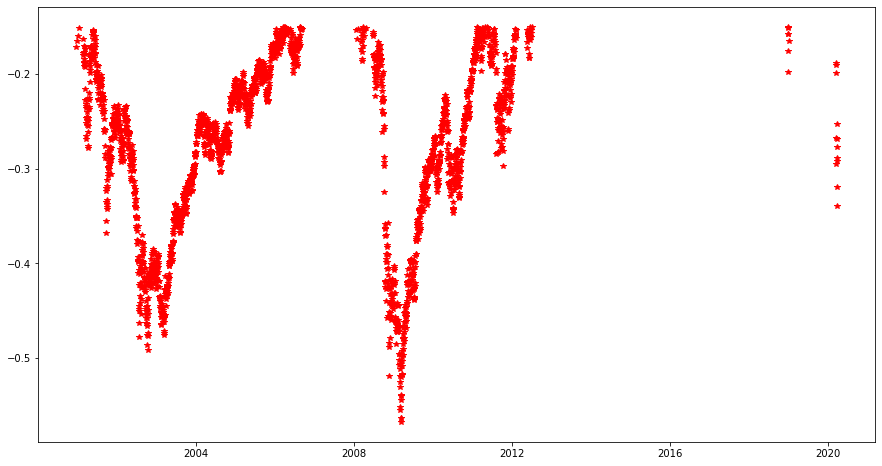

In [39]:
#recession periods


plt.figure(figsize=(15,8))
# x = snp['Date']
# y = snp['Adj Close']
# plt.plot(x,y, 'bo-')
plt.plot(snpdate,snp_dd, 'r*')
plt.show()


In [56]:
index_list= list(snpdate_less_than15.index)
#index_list

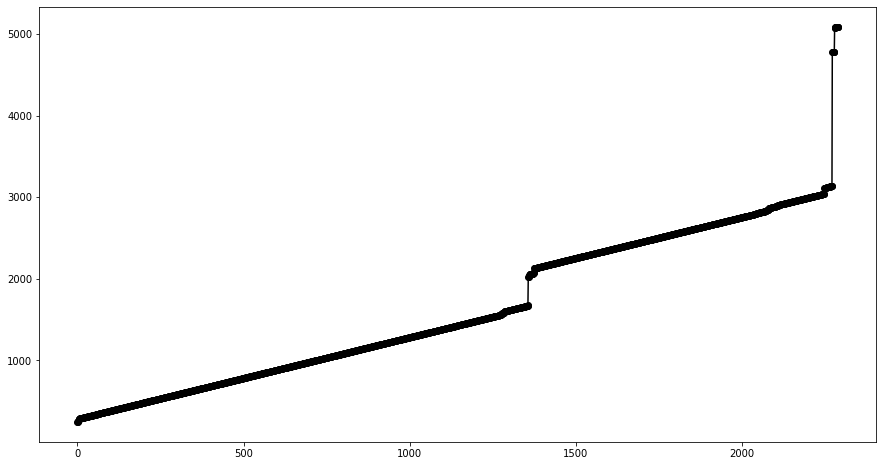

In [61]:
plt.figure(figsize=(15,8))
plt.plot(index_list, '-ok')

In [41]:
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
plt.xaxis.set_major_locator(locator)
plt.xaxis.set_major_formatter(formatter)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

In [ ]:
#any period with S&P more than 15%(-0.15) drawdown is identified as recession


